In [1]:
import nsepy
import talib as ta
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import datetime

In [49]:
plt.style.use('bmh')

pd.options.mode.chained_assignment = None  # default='warn'

nifty50Stocks = pd.read_html('https://en.wikipedia.org/wiki/NIFTY_50')[1]
nifty50Stocks

,Company Name,Symbol,Sector
0,Adani Ports,ADANIPORTS,Infrastructure
1,Asian Paints,ASIANPAINT,Consumer Goods
2,Axis Bank,AXISBANK,Banking
3,Bajaj Auto,BAJAJ-AUTO,Automobile
4,Bajaj Finance,BAJFINANCE,Financial Services
5,Bajaj Finserv,BAJAJFINSV,Financial Services
6,Bharti Airtel,BHARTIARTL,Telecommunication
7,Bharat Petroleum,BPCL,Energy - Oil & Gas
8,Britannia Industries,BRITANNIA,Consumer Goods
9,Cipla,CIPLA,Pharmaceuticals


In [3]:
history = nsepy.get_history(nifty50Stocks.loc[0]['Symbol'], start=datetime.date(2020, 1, 1), end=datetime.date.today())
history

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2020-01-01,ADANIPORTS,EQ,366.00,368.00,379.25,366.00,377.45,377.65,375.71,11377167,4.274459e+14,89107,1155555,0.1016
2020-01-02,ADANIPORTS,EQ,377.65,377.95,384.70,376.50,382.50,383.15,381.66,5919760,2.259337e+14,54749,1072204,0.1811
2020-01-03,ADANIPORTS,EQ,383.15,382.70,384.35,379.20,382.00,382.50,382.01,3684824,1.407636e+14,41829,1082913,0.2939
2020-01-06,ADANIPORTS,EQ,382.50,388.00,388.00,374.75,380.00,380.20,381.73,12482680,4.765071e+14,97444,2245696,0.1799
2020-01-07,ADANIPORTS,EQ,380.20,384.05,389.75,382.40,384.05,384.80,385.49,8091465,3.119178e+14,58470,3028819,0.3743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-21,ADANIPORTS,EQ,727.50,722.70,726.75,709.55,712.00,711.10,716.56,2805791,2.010511e+14,51846,346778,0.1236
2022-02-22,ADANIPORTS,EQ,711.10,698.00,711.10,685.00,711.00,705.55,696.86,6112926,4.259834e+14,101897,2340374,0.3829
2022-02-23,ADANIPORTS,EQ,705.55,711.00,719.40,705.00,707.00,706.70,712.18,2978284,2.121067e+14,60389,635521,0.2134


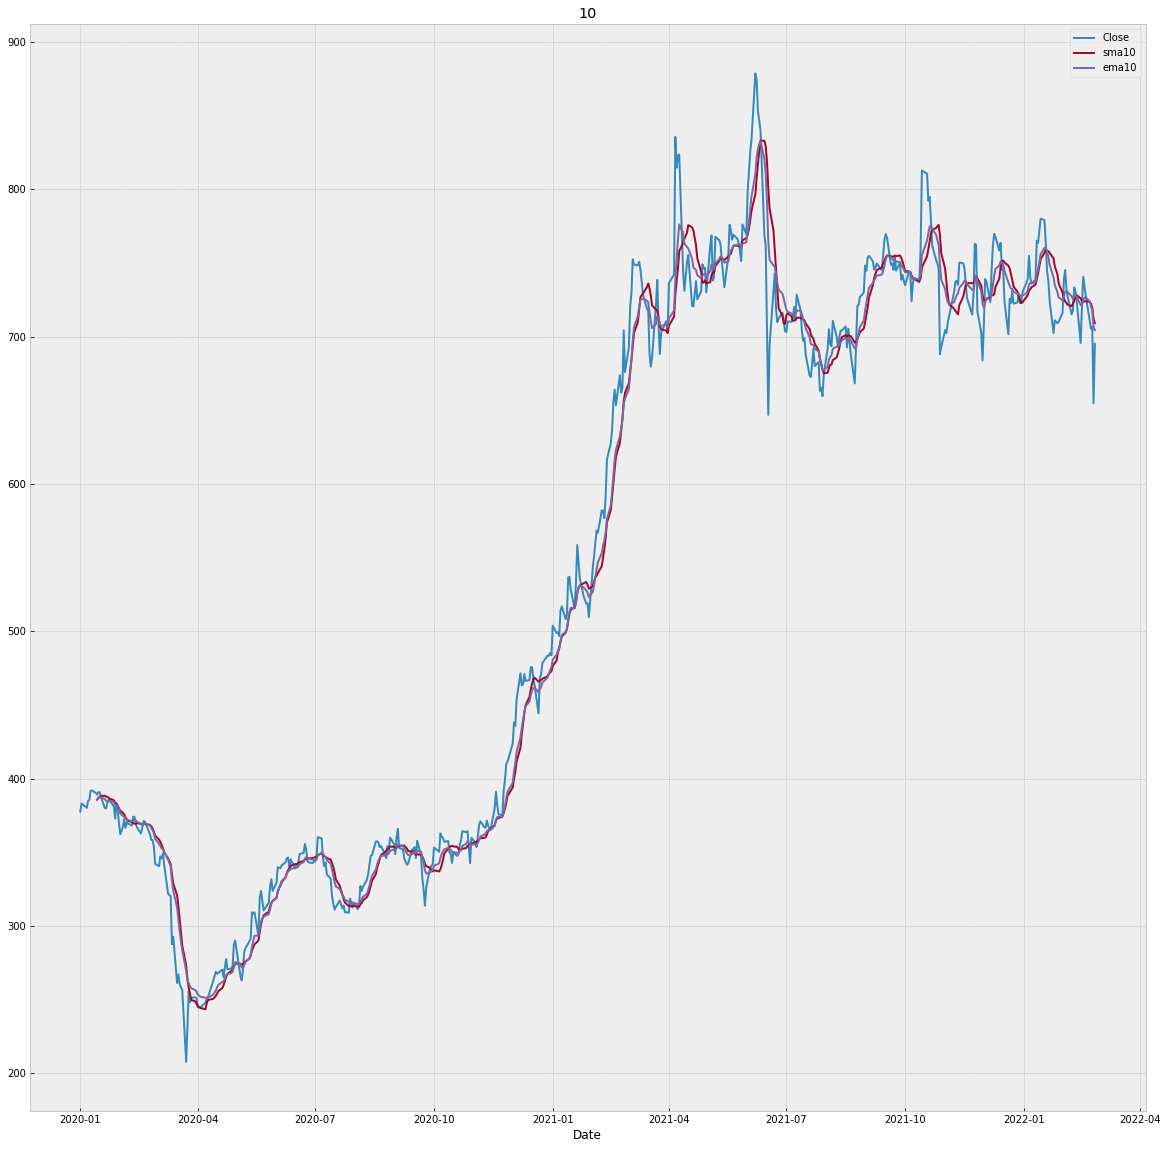

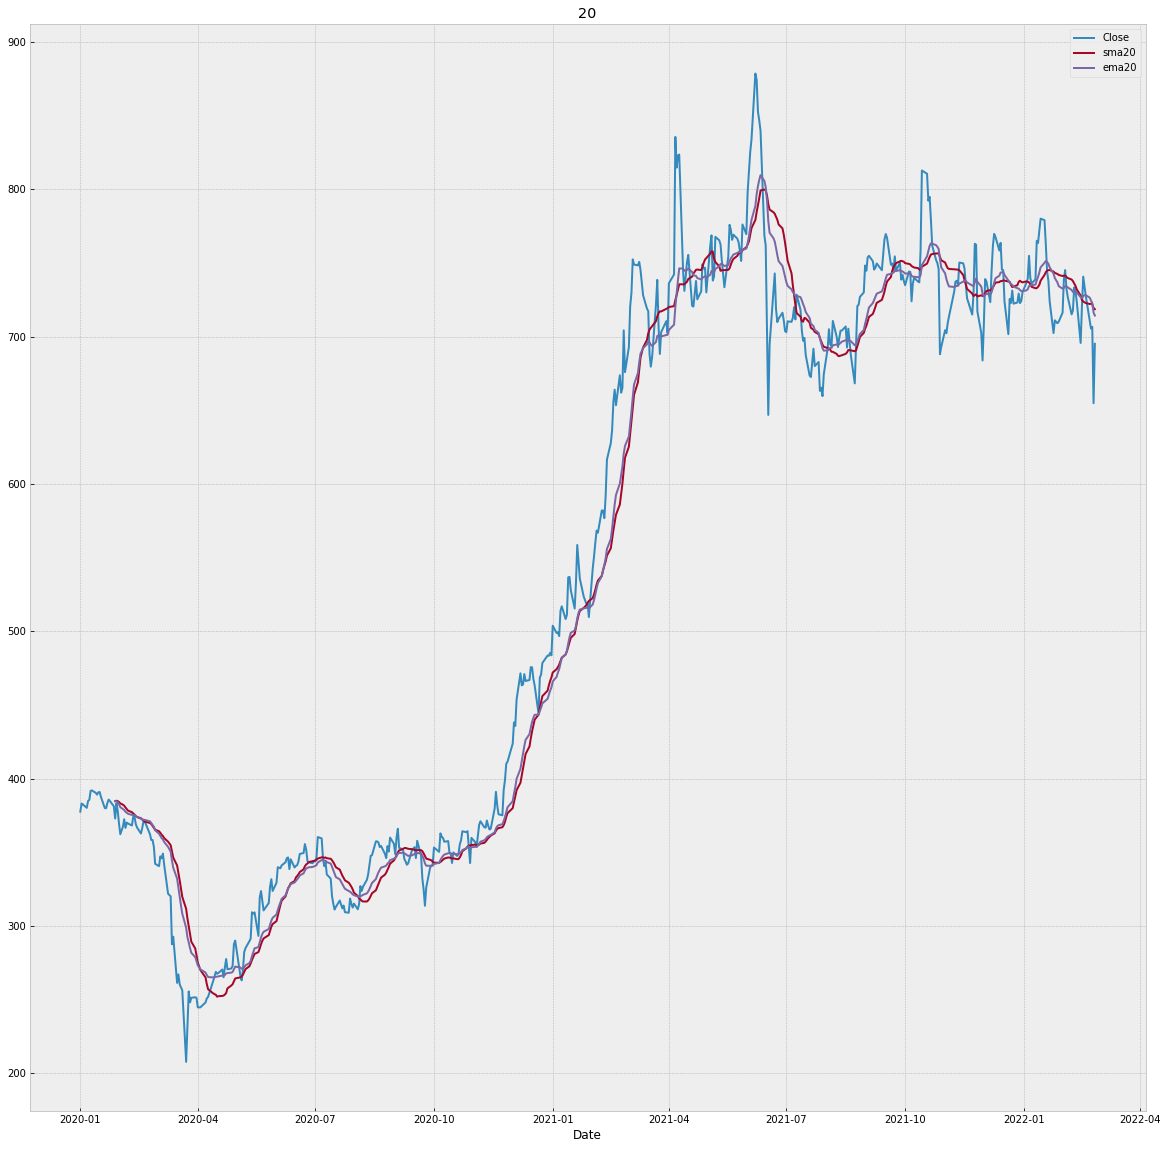

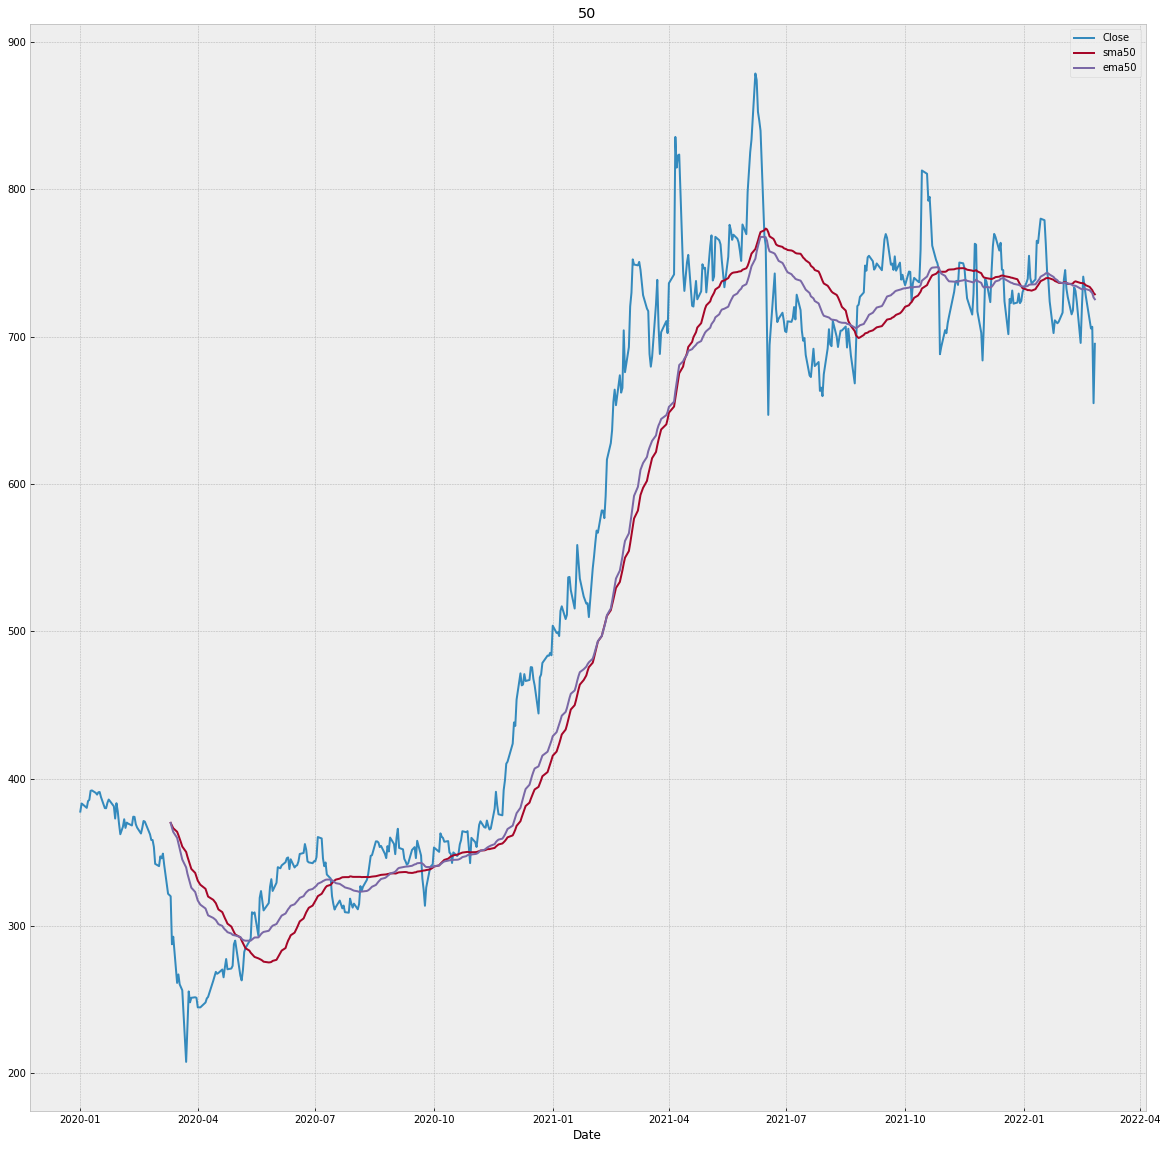

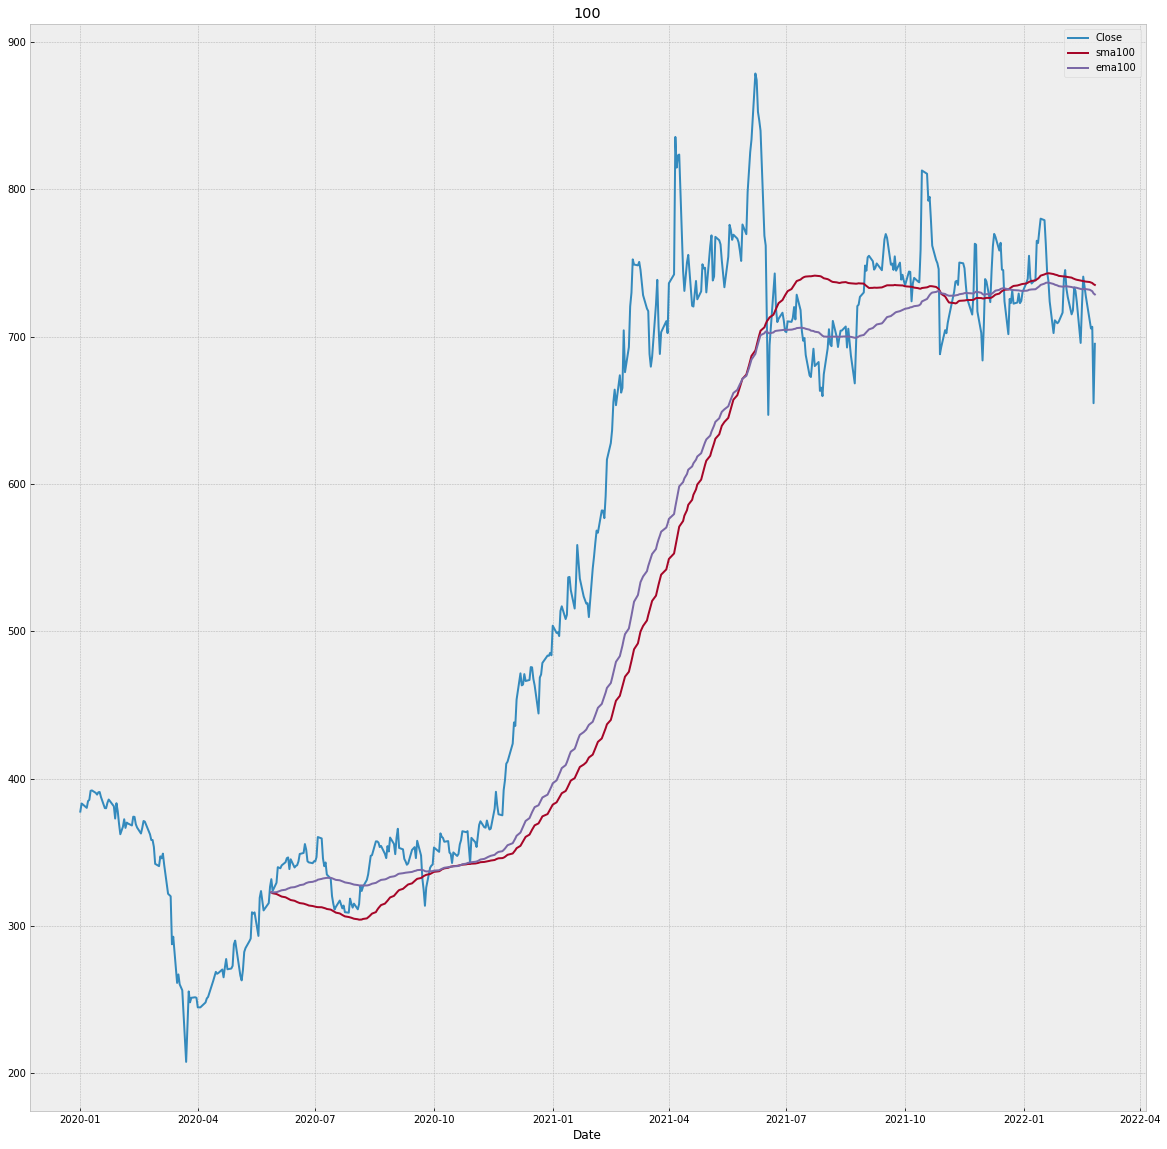

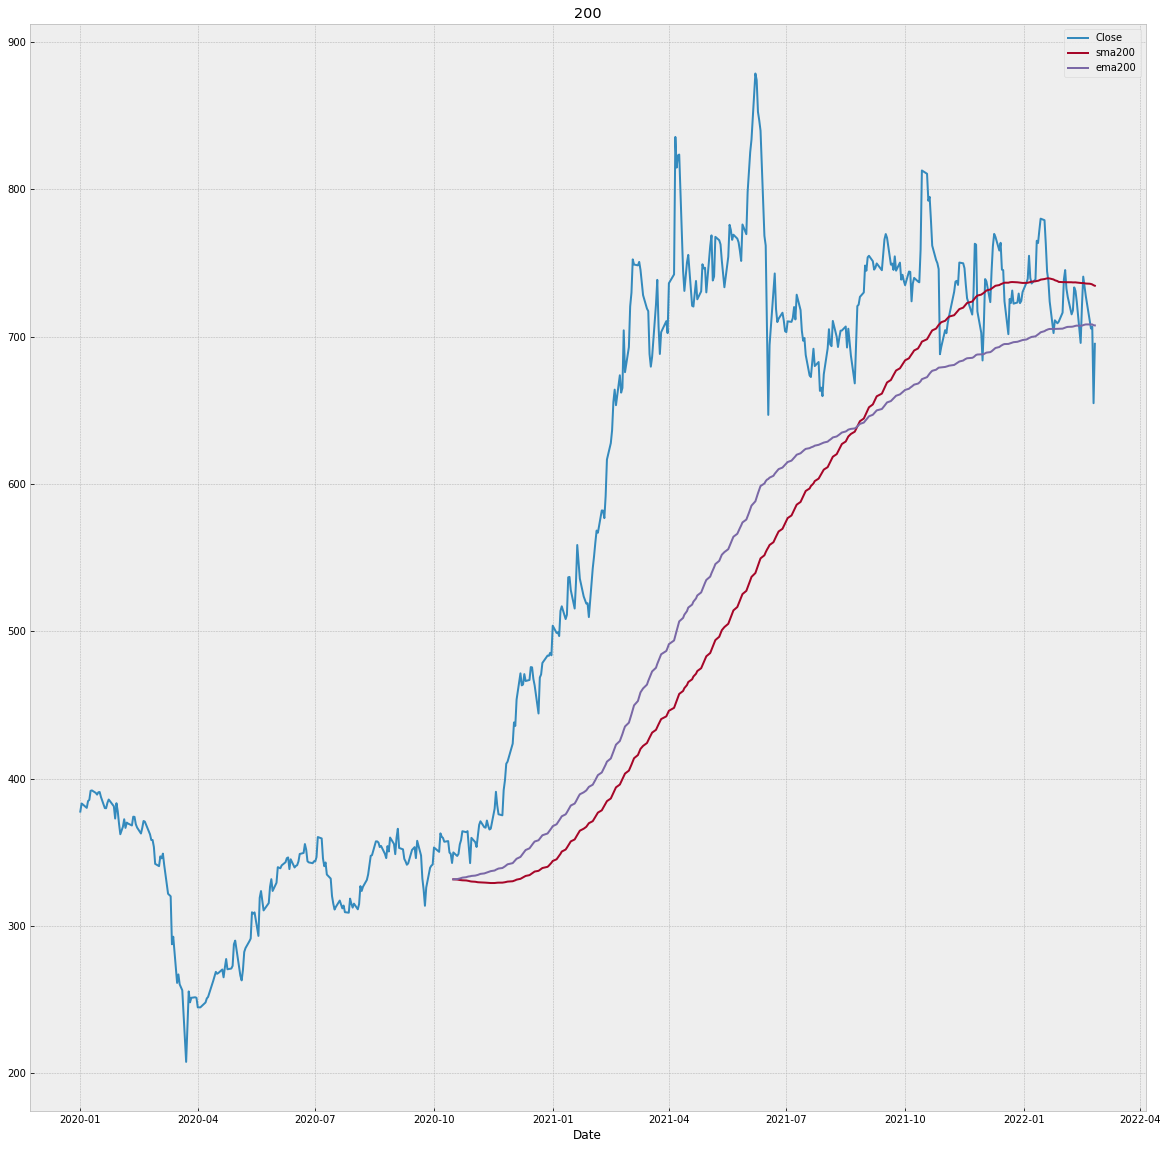

In [4]:
history['sma'] = ta.SMA(history['Close'], 10)
history['ema'] = ta.EMA(history['Close'], 10)

for length in [10,20,50,100,200]:
    history[f'sma{length}'] = ta.SMA(history['Close'], length)
    history[f'ema{length}'] = ta.EMA(history['Close'], length)
    history[['Close',f'sma{length}',f'ema{length}']].plot(title=length,figsize=(20,20))

<AxesSubplot:xlabel='Date'>

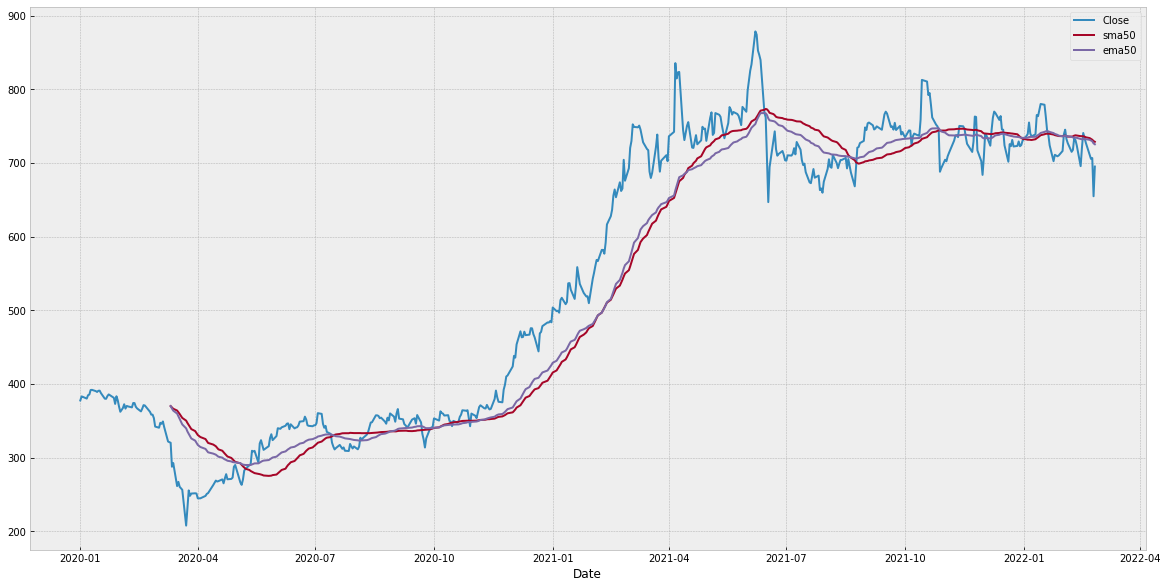

In [5]:
history[['Close','sma50','ema50']].plot(figsize=(20,10))

In [56]:
history['signal'] = 0
history['signal'] = np.where(history['ema50'] > history['sma50'], 1.0, 0.0)
history['position'] = history['signal'].diff()

df = history[history["position"] != 0.0]
# df[['Close', 'signal', 'position']][1:]
df['profit'] = df['Close'][1:].diff()
df[['Close', 'profit', 'ema50', 'sma50']][1:]
df['profit'].sum()

448.79999999999995

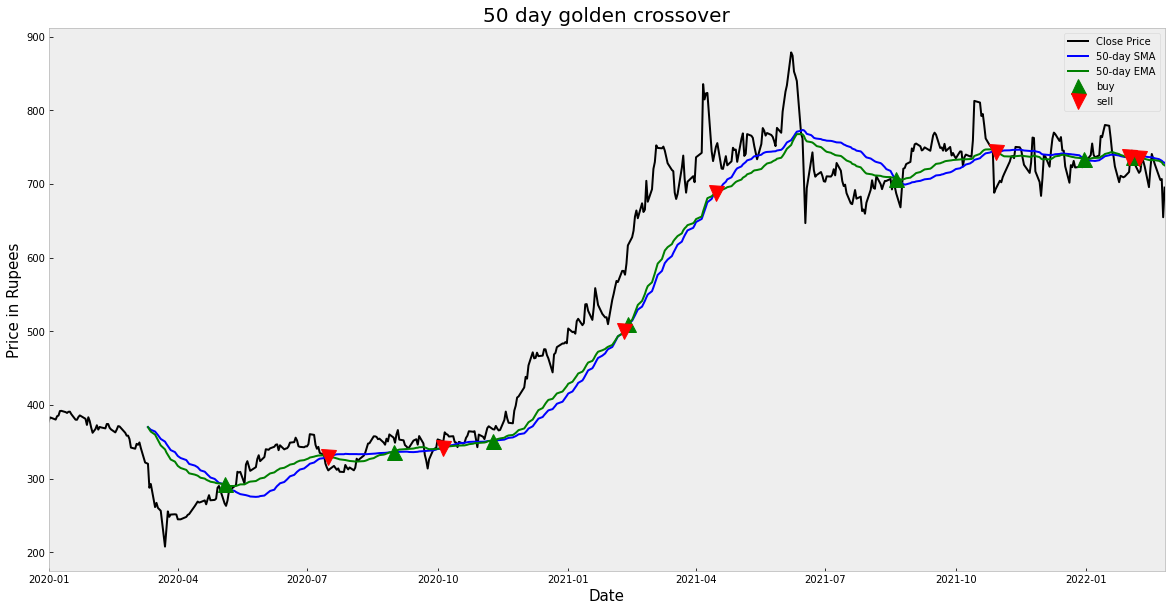

In [59]:
plt.figure(figsize = (20,10))
# plot close price, short-term and long-term moving averages 
history['Close'].plot(color = 'k', label= 'Close Price') 
history['sma50'].plot(color = 'b',label = '50-day SMA') 
history['ema50'].plot(color = 'g', label = '50-day EMA')
# plot 'buy' signals
plt.plot(history[history['position'] == 1].index, 
         history['sma50'][history['position'] == 1], 
         '^', markersize = 15, color = 'g', label = 'buy')
# plot 'sell' signals
plt.plot(history[history['position'] == -1].index, 
         history['ema50'][history['position'] == -1], 
         'v', markersize = 15, color = 'r', label = 'sell')
plt.ylabel('Price in Rupees', fontsize = 15 )
plt.xlabel('Date', fontsize = 15 )
plt.title('50 day golden crossover', fontsize = 20)
plt.legend()
plt.grid()
plt.show()

In [70]:
df_pos = history[(history['position'] == 1) | (history['position'] == -1)]
df_pos['position'] = df_pos['position'].apply(lambda x: 'Buy' if x == 1 else 'Sell')
df_pos

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,sma20,ema20,sma50,ema50,sma100,ema100,sma200,ema200,signal,position
Date,,,,,,,,,,,,,,,,,,,,,


In [1]:
import yfinance
